In [186]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [418]:
X1=np.random.randn(1000,2)
X2=np.random.randn(1000,2)+3

In [419]:
X1=np.hstack((np.ones((1000,1)),X1))
X2=np.hstack((np.zeros((1000,1)),X2))

In [420]:
X=np.vstack((X1,X2))

In [421]:
np.random.shuffle(X)
y=X[:,:1]
X=X[:,1:]

In [422]:
def sig(h):
    return 1/(1+np.exp(-h))

In [423]:
def cost(y,p):
    Err=[]
    zeros=np.where(y==0)
    ones=np.where(y==1)
    Err=np.hstack((-y[ones]*np.log(p[ones]),-(1-y[zeros])*np.log(1-p[zeros])))
    return np.mean(Err)

In [424]:
def norm(X):
    return (X-X.min(0))/(X.max(0)-X.min(0))

In [425]:
X=norm(X)
X=np.hstack((np.ones((2000,1)),X))

In [426]:
epochs=5000
eta=.002
Error=[]
epoch=[]
G=1
w=np.random.randn(3,1)
start=time.time()
for i in range(epochs):
    p=sig(X@w)
    Error.append(cost(y,p))
    epoch.append(i)
#     G=G+(X.T@(p-y))**2
#     eta=eta/np.sqrt(G+1e-9)
    acc=(np.rint(p)==y).mean()
    if acc==1.0:
        print(i)
        break
    w=w-eta*X.T@(p-y)
end=time.time()

In [427]:
Error[-1]

0.04516544992373165

In [428]:
epochs=500
eta0=12
Error=[]
epoch=[]
G=1
np.random.seed(200)
w=np.random.randn(3,1)
start=time.time()
for i in range(epochs):
    p=sig(X@w)
    Error.append(cost(y,p))
    epoch.append(i)
    acc=(np.rint(p)==y).mean()
    if acc==1.0:
        print(i)
        break
    G=G+(X.T@(p-y))**2
    eta=eta0/np.sqrt(G+1e-9)
    w=w-eta*X.T@(p-y)
end=time.time()

In [429]:
Error_ADA=Error

0.2067403793334961


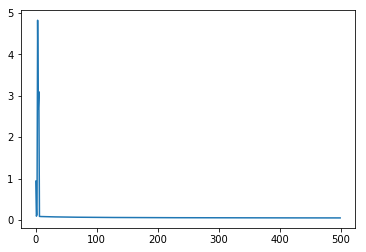

In [430]:
print(end-start)
plt.plot(epoch,Error)

In [431]:
(np.rint(1/(1+np.exp(-X@w)))==y).mean()

0.9835

In [432]:
Error[-1]

0.0472651725678075

In [433]:
colors=np.array(['red','blue'])

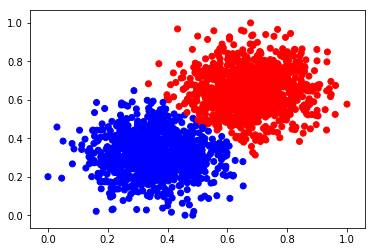

In [434]:
plt.scatter(X[:,1],X[:,2],color=colors[np.rint(1/(1+np.exp(-X@w))).astype(int).reshape(-1)])

In [435]:
epochs=500
eta0=12
Error=[]
epoch=[]
G=1
np.random.seed(200)
w=np.random.randn(3,1)
start=time.time()
for i in range(epochs):
    p=sig(X@w)
    Error.append(cost(y,p))
    epoch.append(i)
    acc=(np.rint(p)==y).mean()
    if acc==1.0:
        print(i)
        break
    G=G*.9+.9*(X.T@(p-y))**2
    eta=eta0/np.sqrt(G+1e-9)
    w=w-eta*X.T@(p-y)
end=time.time()

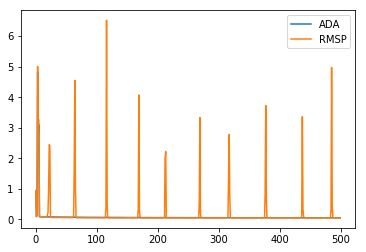

In [436]:
plt.plot(Error_ADA, label='ADA')
plt.plot(Error, label='RMSP')
plt.legend()